In [1]:
%load_ext autoreload
%autoreload 2

# One Dimensional Heat Equation

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use("dark_background")
import sys, os

sys.path.append(os.path.abspath(os.path.join('..')))

import diffuconpy as dc

import animations

The One dimensional Diffusion Model is governed by the following pde:

$$\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2}$$

Which initial condition:

$$u(x, 0) = a \frac{1}{\sqrt{2 \pi \sigma}}\exp{\left(-\frac{1}{2 \sigma} x^2\right)}$$

Solving this model numerically one would have to discretize this model. 

$$\therefore u_{i}^{n+1} = u_{i}^{n} + \left(D\frac{\Delta t}{\Delta x^2}\right)[u_{i+1}^{n} + u_{i-1}^{n} - 2u_{i}^{n}]$$

See source code `diffuconpy` to see the full implementation of this discretization.

To model the Diffusion Equation, one must consider the number of step the model will advance in time `Nt = 250` and space `Nx = 300`. Also $\Delta t$ which is `dt = 1/Nt` in the code below and $\Delta x$ which is `dx = (5-(-5)/Nx)`. the boundary points on this plot are $-5$ and $5$, at which the initial function is $0$. the Diffusion coefficient `diffusion` is $0.08$.

The solution to this equation is the temperature (Kelvin) of a space at a time (t).

In [3]:
# Numbers of space and time steps
Nt = 250
Nx = 300

# Space and time step size
dt = (1-0)/Nt
dx = (5-(-5))/Nx

# Convection Coefficient
diffusion = 0.08

# Setting up the initial condition
x = np.arange(-5, 5, dx)

# Initial Array
sigma = 0.01
amp = 1

init = amp*(1/np.sqrt(sigma*2*np.pi))*np.exp(-(1/2)*((x**2)/sigma))

## Boundary Conditions

### Dirichlet 

For 1 dimensional diffusion, the Dirichlet boundary conditions take the following form

$$u(x_0, t) = u_0$$ 
$$u(x_1, t) = u_1$$

For all $t>0$ and boundary points $x_0$ and $x_1$. In this example, let $u_0 = u_1 = 0$. 


### Neumann

The Neumann boundary conditions for 1 dimensional diffusion are defined as

$$u^{\prime}(x_0, t) = u^{\prime}_0$$
$$u^{\prime}(x_1, t) = u^{\prime}_1$$

For all $t>0$. for this example, let $u^{\prime}_0 = u^{\prime}_1 = 0$, or say there is zero 'flux' in the boundary.

## Solving the PDE

In [4]:
def solve(Nt, Nx, dt, dx, diffusion, init):
    heat_equation = dc.diffusion_1dims(Nt, Nx, dt, dx, diffusion, init)
    sol_Dirichlet = heat_equation.solve_Dirichlet(boundary=[0, 0])
    sol_Neumann = heat_equation.solve_Neumann(boundary_flux=[0, 0])

    return sol_Dirichlet.solution, sol_Neumann.solution

In [5]:
dirichlet, neumann = solve(Nt, Nx, dt, dx, diffusion, init)

## Plotting the initial condition

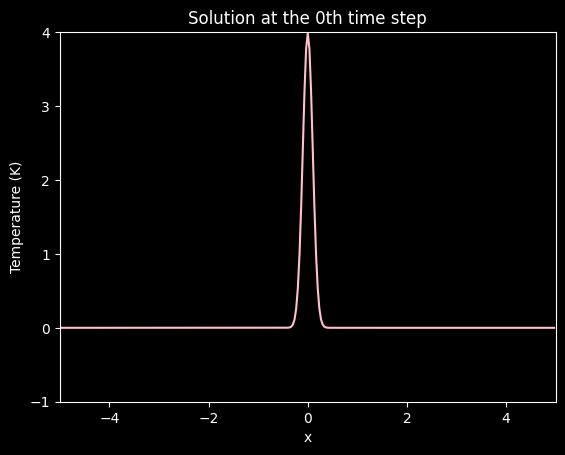

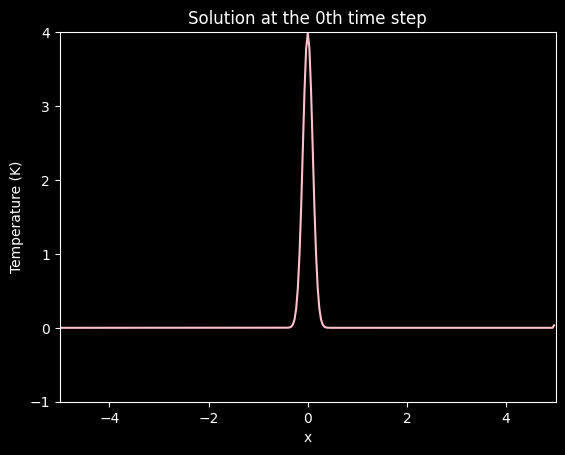

In [6]:
# Plotting the 0th time step state
plt.figure(0)
ax = plt.axes(xlim=(-5, 5), ylim=(-1, 4)) # left bound -5 and right bound 5
ax.plot(x, dirichlet[0], color='pink')
plt.title('Solution at the 0th time step')
plt.xlabel('x')
plt.ylabel('Temperature (K)')
plt.show()

# Plotting the 0th time step state
plt.figure(1)
ax = plt.axes(xlim=(-5, 5), ylim=(-1, 4)) # left bound -5 and right bound 5
ax.plot(x, neumann[0], color='pink')
plt.title('Solution at the 0th time step')
plt.xlabel('x')
plt.ylabel('Temperature (K)')
plt.show()

## Animating the Solution

In [7]:
# Setting up the animation
FPS = 60
FRN = 250
FILE_1 = './img/diffusion_in_1_dimension_dirichlet.gif'
FILE_2 = './img/diffusion_in_1_dimension_neumann.gif'

# Calling the animation function.
# See the animation at ./example-img/convection_in_1_dimension.gif
animations.animation_1(
    solution=dirichlet, 
    X=x, 
    xlab='x', 
    ylab='Temperature (K)', 
    title='Solution to heat equation with Dirichlet boundary conditions', 
    color='pink', 
    xlim_=(-5, 5), 
    ylim_=(-1, 4), 
    fps=FPS, 
    frn=FRN, 
    filename=FILE_1
    )

animations.animation_1(
    solution=neumann, 
    X=x, 
    xlab='x', 
    ylab='Temperature (K)', 
    title='Solution to heat equation with Neumann boundary conditions', 
    color='pink', 
    xlim_=(-5, 5), 
    ylim_=(-1, 4), 
    fps=FPS, 
    frn=FRN, 
    filename=FILE_2
    )

![diffusion_in_1_dimension_dirichlet.gif](img/diffusion_in_1_dimension_dirichlet.gif)

Diffusion on Dirichlet boundary conditions.

![diffusion_in_1_dimension_neumann.gif](img/diffusion_in_1_dimension_neumann.gif)

Diffusion on Neumann boundary conditions.